In [2]:
# Insatal Library
!pip install pandas matplotlib scikit-learn

In [23]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

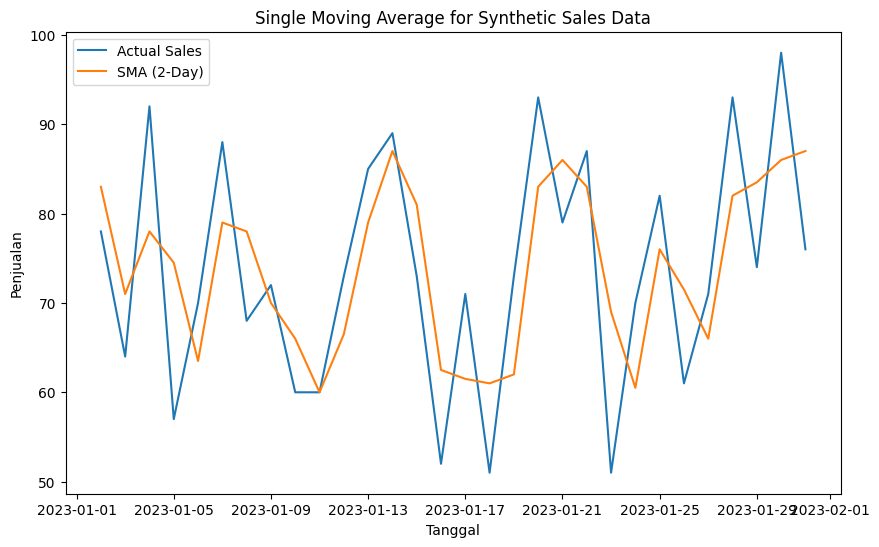

Absolute Errors:
Tanggal
2023-01-02     5.0
2023-01-03     7.0
2023-01-04    14.0
2023-01-05    17.5
2023-01-06     6.5
2023-01-07     9.0
2023-01-08    10.0
2023-01-09     2.0
2023-01-10     6.0
2023-01-11     0.0
2023-01-12     6.5
2023-01-13     6.0
2023-01-14     2.0
2023-01-15     8.0
2023-01-16    10.5
2023-01-17     9.5
2023-01-18    10.0
2023-01-19    11.0
2023-01-20    10.0
2023-01-21     7.0
2023-01-22     4.0
2023-01-23    18.0
2023-01-24     9.5
2023-01-25     6.0
2023-01-26    10.5
2023-01-27     5.0
2023-01-28    11.0
2023-01-29     9.5
2023-01-30    12.0
2023-01-31    11.0
dtype: float64
MAE: 8.466666666666667
MAPE: 0.12%

Matrix Pengujian:
            Actual  Predicted
Tanggal                      
2023-01-02      78       83.0
2023-01-03      64       71.0
2023-01-04      92       78.0
2023-01-05      57       74.5
2023-01-06      70       63.5
2023-01-07      88       79.0
2023-01-08      68       78.0
2023-01-09      72       70.0
2023-01-10      60       66.0
2023-0

In [25]:
# Fungsi untuk menghitung Single Moving Average
def single_moving_average(data, window_size):
    return data['Penjualan'].rolling(window=window_size).mean()

# Fungsi untuk membuat matrix pengujian
def create_test_matrix(actual, predicted):
    test_matrix = pd.DataFrame({
        'Actual': actual,
        'Predicted': predicted
    })
    return test_matrix

# Fungsi untuk menghitung Absolute Error
def absolute_error(y_true, y_pred):
    return np.abs(y_true - y_pred)


# Membuat dataset sintetis
np.random.seed(42)
tanggal = pd.date_range(start='2023-01-01', end='2023-01-31', freq='D')
penjualan_actual = np.random.randint(50, 100, size=len(tanggal))
data_sintetis = pd.DataFrame({'Tanggal': tanggal, 'Penjualan': penjualan_actual})
data_sintetis.set_index('Tanggal', inplace=True)

# Tentukan ukuran jendela (window size) untuk Single Moving Average
window_size = 2

# Hitung Single Moving Average
data_sintetis['SMA'] = single_moving_average(data_sintetis, window_size)

# Hapus baris dengan nilai NaN yang dihasilkan oleh rolling mean
data_sintetis.dropna(inplace=True)

# Hitung AE (Absolute Error)
ae = absolute_error(data_sintetis['Penjualan'], data_sintetis['SMA'])

# Hitung MAE (Mean Absolute Error)
mae = mean_absolute_error(data_sintetis['Penjualan'], data_sintetis['SMA'])

# Hitung MAPE (MEan Absolute Percentage Error)
mape = mean_absolute_percentage_error(data_sintetis['Penjualan'], data_sintetis['SMA'])

# Plot hasil Single Moving Average
plt.figure(figsize=(10, 6))
plt.plot(data_sintetis['Penjualan'], label='Actual Sales')
plt.plot(data_sintetis['SMA'], label=f'SMA ({window_size}-Day)')
plt.title('Single Moving Average for Synthetic Sales Data')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.legend()
plt.show()

# Tampilkan AE, MAE, dan MAPE
print(f'Absolute Errors:\n{ae}')
print(f'MAE: {mae}')
print(f'MAPE: {mape:.2f}%')

# Buat matrix pengujian
test_matrix = create_test_matrix(data_sintetis['Penjualan'], data_sintetis['SMA'])
print('\nMatrix Pengujian:')
print(test_matrix)

